# 1. Import Packages and Load Dataset

In [2]:
# Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import plot_tree

In [3]:
# Load data
df = pd.read_csv("data.csv")

# 2. Simple EDA and Cleaning

Initial EDA and data cleaning will invlove the following steps:
* Query the names and types of columns
* Rename columns to be concise, descriptive, and gramatically correct
* Columns that contain boolean values will have the data mapped to be categorical instead of numerical
    * This makes displaying data easier and removes them from any numerical analysis
* Get descriptive statistics
* Check for missing values in the dataset
* Check for duplicated data observations
    * Remove any duplicated observations that are statistically significant
* Check all numerical columns for outliers

In [4]:
# Get basic dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Rename columns for readability
df = df.rename(columns={
    "satisfaction_level": "Satisfaction Level",
    "last_evaluation": "Last Evaluation Score",
    "number_project": "Number of Projects",
    "average_montly_hours": "Average Monthly Hours",
    "time_spend_company": "Tenure (Years)",
    "Work_accident": "Work Accident?",
    "left": "Left Company?",
    "promotion_last_5years": "Promoted in Last 5 Years?",
    "salary": "Salary (USD)"
})

df.columns

Index(['Satisfaction Level', 'Last Evaluation Score', 'Number of Projects',
       'Average Monthly Hours', 'Tenure (Years)', 'Work Accident?',
       'Left Company?', 'Promoted in Last 5 Years?', 'Department',
       'Salary (USD)'],
      dtype='object')

In [6]:
# Convert boolean columns to be categorical
df["Work Accident?"] = df["Work Accident?"].map({1: "Yes", 0: "No"})
df["Left Company?"] = df["Left Company?"].map({1: "Yes", 0: "No"})
df["Promoted in Last 5 Years?"] = df["Promoted in Last 5 Years?"].map({1: "Yes", 0: "No"})

In [7]:
# Descriptive statistics
df.describe()

,Satisfaction Level,Last Evaluation Score,Number of Projects,Average Monthly Hours,Tenure (Years)
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [8]:
# Check for missing values
df.isna().sum()

Satisfaction Level           0
Last Evaluation Score        0
Number of Projects           0
Average Monthly Hours        0
Tenure (Years)               0
Work Accident?               0
Left Company?                0
Promoted in Last 5 Years?    0
Department                   0
Salary (USD)                 0
dtype: int64

No values are missing so no action is needed.

In [9]:
# Check for duplicates
df.duplicated().sum()

3008

Because a significant portion of the data observations are duplicates, a likelihood analysis will be performed to determine whether each duplicated observation is significant. For a given observation, the chances of someone reporting the same data will be calculated by dividing the number of occurances of a value in its respective field by total number of observations, then multiplying those ratios together for every field. If the total odds are less than 5%, this implies statistical significance, i.e. duplicated data, as opposed to two workers coincidentally reporting the same data. Any statistically significant rows in the duplicated data will be dropped from the main dataframe.

In [10]:
# Isolate duplicated data
df_dupe = df[df.duplicated()]

num_rows = df.shape[0]
alpha = 0.05 # Significance level
num_dropped = 0

for index, row in df_dupe.iterrows():

    chance = 1
    for col in df:
        count = df[col].value_counts()[row[col]] # Number of instances of each value in its column
        chance *= count / num_rows # Multiply odds of someone reporting the same value for each column

    # Statistical significance -> duplicates -> drop
    if chance <= alpha:
        df.drop(index, inplace=True)
        print(f"Row {index} dropped")
        num_dropped += 1

print(f"{num_dropped} duplicates dropped")


Row 396 dropped
Row 866 dropped
Row 1317 dropped
Row 1368 dropped
Row 1461 dropped
Row 1516 dropped
Row 1616 dropped
Row 1696 dropped
Row 1833 dropped
Row 12000 dropped
Row 12001 dropped
Row 12002 dropped
Row 12003 dropped
Row 12004 dropped
Row 12005 dropped
Row 12006 dropped
Row 12007 dropped
Row 12008 dropped
Row 12009 dropped
Row 12010 dropped
Row 12011 dropped
Row 12012 dropped
Row 12013 dropped
Row 12014 dropped
Row 12015 dropped
Row 12016 dropped
Row 12017 dropped
Row 12018 dropped
Row 12019 dropped
Row 12020 dropped
Row 12021 dropped
Row 12022 dropped
Row 12023 dropped
Row 12024 dropped
Row 12025 dropped
Row 12026 dropped
Row 12027 dropped
Row 12028 dropped
Row 12029 dropped
Row 12030 dropped
Row 12031 dropped
Row 12032 dropped
Row 12033 dropped
Row 12034 dropped
Row 12035 dropped
Row 12036 dropped
Row 12037 dropped
Row 12038 dropped
Row 12039 dropped
Row 12040 dropped
Row 12041 dropped
Row 12042 dropped
Row 12043 dropped
Row 12044 dropped
Row 12045 dropped
Row 12046 dropped
Row

In this case, all 3008 flagged rows were likely duplicates, so they were dropped accordingly.

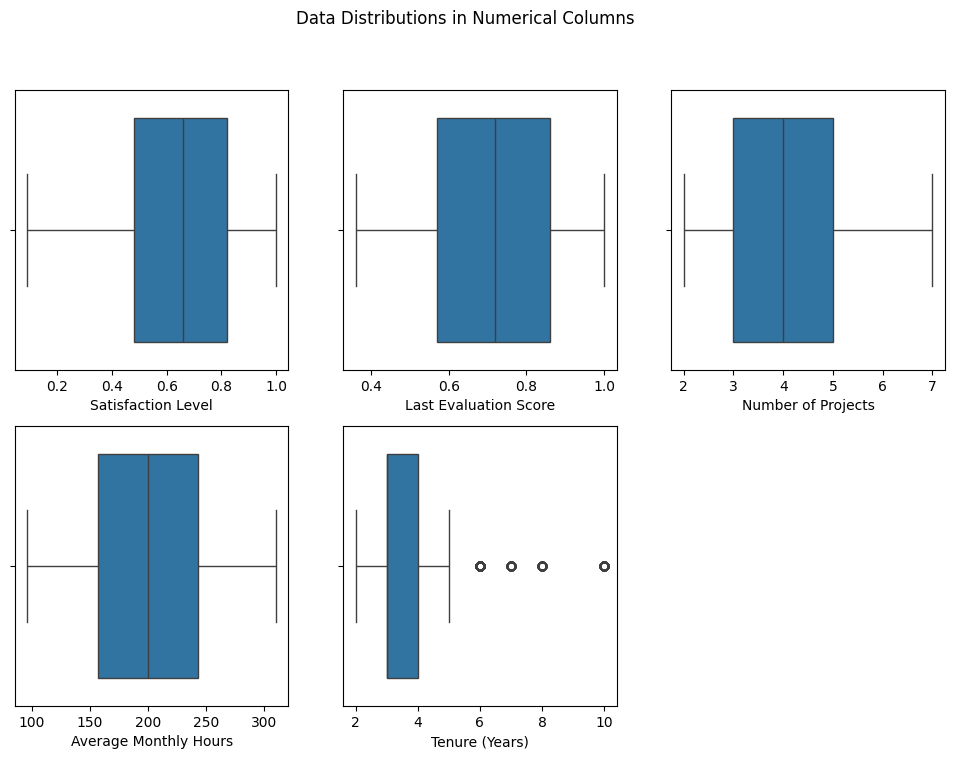

In [11]:
# Check for outliers

fig = plt.figure(figsize=(12, 8))
i = 1

# For each column, if numeric type, then create box plot
for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.subplot(2, 3, i)
        sns.boxplot(x=df[col])
        i += 1

fig.suptitle("Data Distributions in Numerical Columns")
plt.show()

Out of the numerical columns from the dataset, "Tenure" is the only one to contain outliers. No action will be taken now, however this will be relevant when creating predictive models later in the analysis.

# 3. Advanced EDA

As a baseline, the proportion of people who have left the company will be computed then the distribution of satisfaction levels between these groups will be plotted.

In [12]:
# Get percentages of people who left vs. stayed
print(df["Left Company?"].value_counts(normalize=True))

Left Company?
No     0.833959
Yes    0.166041
Name: proportion, dtype: float64


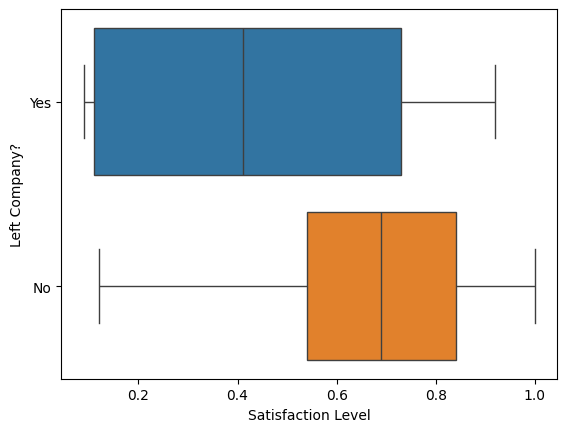

In [13]:
# Plot distribution of satisfaction level by whether employee has left

sns.boxplot(data=df, x="Satisfaction Level", y="Left Company?", hue="Left Company?")
plt.show()

This plot shows that across the board, satisfaction level is a major contributing factor towards whether an employee leaves the company. The next step is to identify the factors that influence satisfaction level.

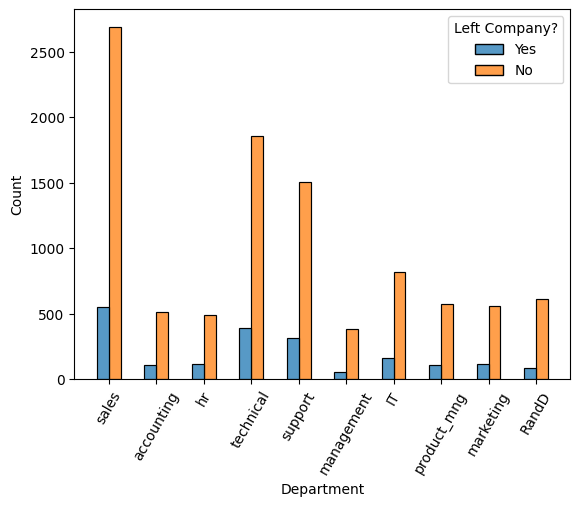

In [14]:
# Plot split of employees who have left based on department

sns.histplot(data=df, x='Department', hue='Left Company?', multiple='dodge', shrink=0.5)
plt.xticks(rotation=60)
plt.show()

The ratios between groups for each department do not appear to change much, indicating that the factors that are driving employees to leave persist across all departments.

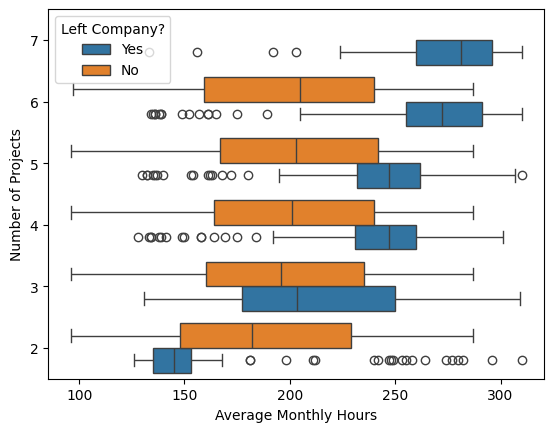

In [15]:
# Plot distributions of monthly hours worked separated by number of projects

sns.boxplot(data=df, x="Average Monthly Hours", y="Number of Projects", hue="Left Company?", orient="h").invert_yaxis()
plt.show()

This plot shows that the people who have left the company are working longer hours and taking on more projects than average. Of the people who are still with the company, the number of hours worked per month is relavively constant, regardless of the number of projects worked. This indicates that working disproportionately more hours is a factor in lower satisfaction levels. To confirm this, a scatterplot of average monthly hours vs. satisfaction level will be created.

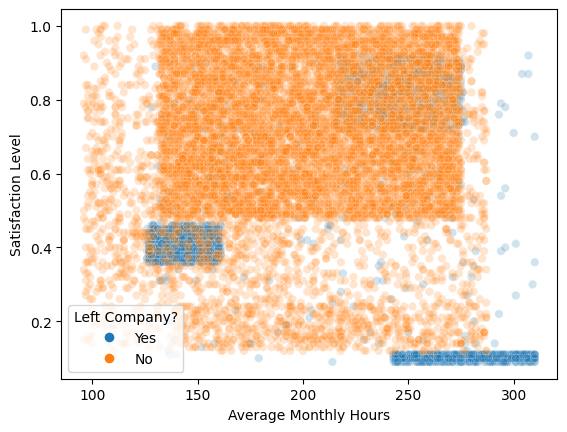

In [16]:
# Plot satisfaction level against average monthly hours

scatterplot_handles = [Line2D([0], [0], marker="o", color="w", markerfacecolor="C0", label="Yes", markersize=8), Line2D([0], [0], marker="o", color="w", markerfacecolor="C1", label="No", markersize=8)]

sns.scatterplot(data=df, x='Average Monthly Hours', y='Satisfaction Level', hue='Left Company?', alpha=0.2)
plt.legend(title="Left Company?", handles=scatterplot_handles)
plt.show()

There are three main groups of people who have left the company:
1. Below average monthly hours and slightly below average satisfaction.
2. Above average monthly hours and high satisfaction.
3. Very high monthly hours and very low satisfaction.

This confirms that a large portion of employees are overworked and are not satisfied with their current position.

Next, let's check if workers that put in more hours are compensated more.

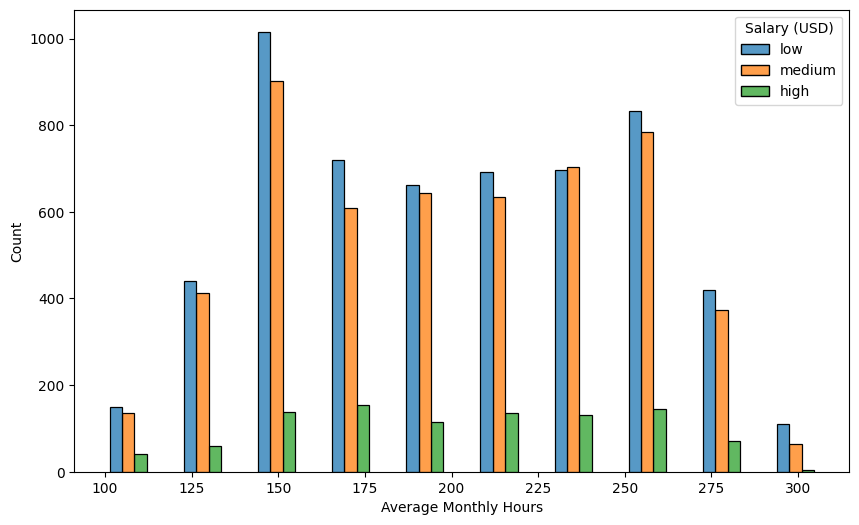

In [17]:
# Plot histogram of monthy hours separated by salary group

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Average Monthly Hours', hue='Salary (USD)', bins=10, multiple="dodge", shrink=0.5)
plt.show()

The distribution of average monthly hours resembles a normal distribution and the ratios between salary groups for each bin are fairly similar. This indicates that salary does not change much with the number of hours worked.

Let's check if satisfaction level is influenced by how long someone has worked at the company.

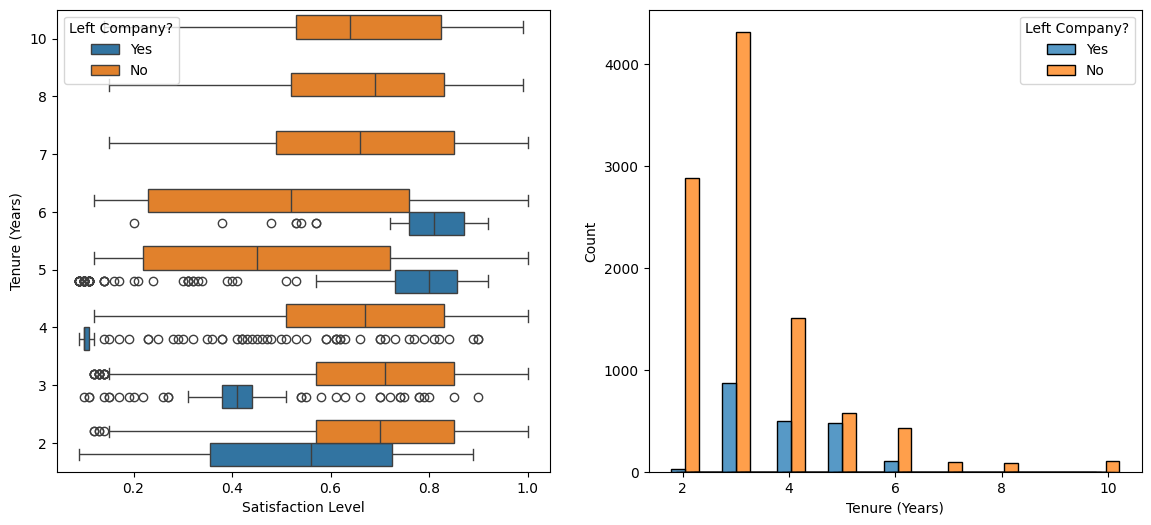

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot distribution of satisfaction levels separate by tenure length
sns.boxplot(data=df, x='Satisfaction Level', y='Tenure (Years)', hue='Left Company?', orient='h', ax=ax[0]).invert_yaxis()

# Plot histogram of tenure
sns.histplot(data=df, x='Tenure (Years)', hue='Left Company?', multiple='dodge', shrink=6, ax=ax[1])

plt.show()

There is a lot of information in these plots:
* There are tow general categories, dissastifies employees with shorter tenures and satisfied employees with longer tenures.
* The average satisfaction at four years is significantly lower than any other year, this may be worth investigating.
* The longest-tenured employees have not left the company. The satisfaction levels are similar to the longest-tenures enployees who have left.
* The histogram shows that there are very few longer-tenured employees.

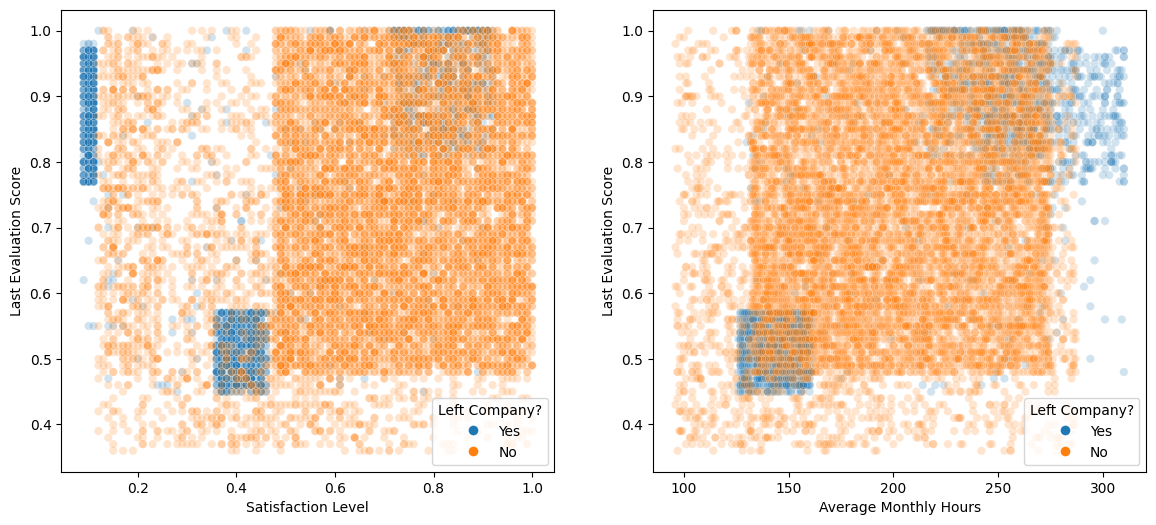

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot last evaluation scores against satisfaction levels
sns.scatterplot(data=df, x='Satisfaction Level', y='Last Evaluation Score', hue='Left Company?', alpha=0.2, ax=ax[0])
ax[0].legend(title="Left Company?", handles=scatterplot_handles)

# Plot last evaluation scores against average monthly hours
sns.scatterplot(data=df, x='Average Monthly Hours', y='Last Evaluation Score', hue='Left Company?', alpha=0.2, ax=ax[1])
ax[1].legend(title="Left Company?", handles=scatterplot_handles)

plt.show()

When looking at evaluation scores against avarage monthly hours, of people who left, working more hours leads to a higher evaluation score. When looking at the employees with high evaluation scores who have left in comparison to thier satisfaction level, there are two groups. Some employees are very satisfied, however there is a large group that is unsatisfied.

Lastly, let's check if there is any correlation with hours worked and whether employees have been recently promoted.

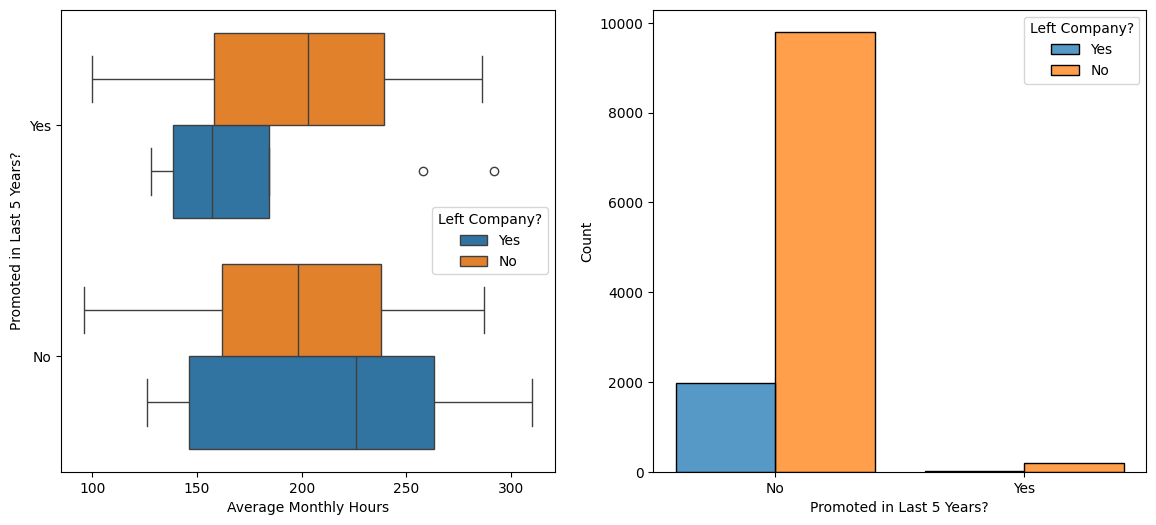

In [20]:
# Plot distributions of monthly hours worked separated by whether the employee was promoted in the last 5 years

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df, x="Average Monthly Hours", y="Promoted in Last 5 Years?", hue="Left Company?", orient="h", ax=ax[0]).invert_yaxis()
sns.histplot(data=df, x='Promoted in Last 5 Years?', hue='Left Company?', multiple='dodge', ax=ax[1], shrink=0.8)
plt.show()

Based on the histogram, very few people hae been promoted in the last five years. Of the people who have not been promoted, on average, the ones who have left are the ones working more hours.

### EDA Conclusions

We know that across the board, satisfaction is tied to whether an employee will leave. This does not vary much across different departments. People who have left the company tend to work more projects and longer hours. There does not appear to be an increase in salary with working more hours. When looking at evaluation scores, working longer is highly favored by the company, but this leads to lover satisfaction levels. Overall the company hos not issued many promotions the last five years.

The issue with employee retention appears to be caused by requiring large amounts of work from employees without rewarding them. This is enforced through evaluations, favoring employees who work longer hours. However, these employees are pushed to 250 hours or more a month and are not compensated more nor are recieving promotions.

# 4. Logistic Regression

To develop a predictive model that will determine whether an employee will leave the company, we will start with a logistic regression, as the output space is categorical. Specifically, the output space is binary (an employee has either left the company or they haven't), so a binary logistic regression will be used. A correlation heatmap of the numeric vaiables will be created.

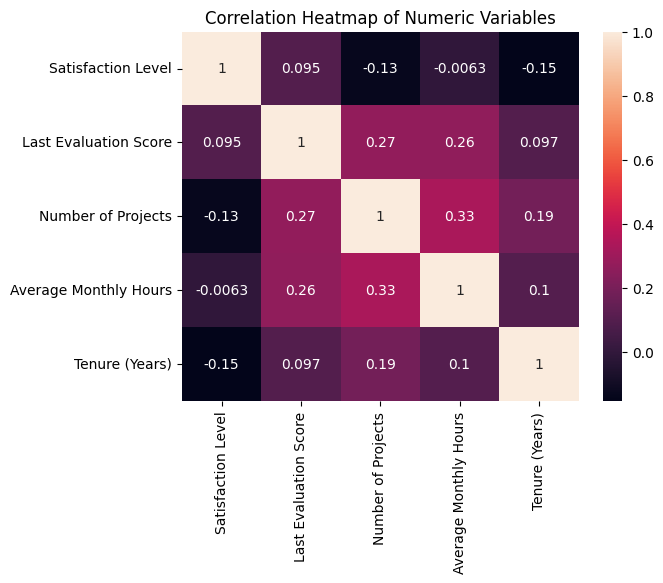

In [21]:
# Create a heatmap to visualize how correlated variables are

sns.heatmap(df[[col for col in df if pd.api.types.is_numeric_dtype(df[col])]].corr(), annot=True)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

The following steps will be taken to prepare the data for logistic regresion:
1. "Salary" is categorical, but it is ordered, so it will be encoded as an ordinal numeric category.
2. The boolean categories that were converted to categorical will be converted back to numerical. This way they can be more accurately used as independent variables in the regression.
3. The remaining categorical variables will be dummy encoded.
4. "Tenure" was the only numerical column to have outliers, any dataframe rows containing those values will be dropped.

In [22]:
# Copy the dataframe
df_enc = df.copy()

# Encode the "Salary" column as an ordinal numeric category
df_enc["Salary (USD)"] = df_enc["Salary (USD)"].map({"low": 0, "medium": 1, "high": 2})

# Convert boolean columns back to numerical
df_enc["Work Accident?"] = df_enc["Work Accident?"].map({"Yes": 1, "No": 0})
df_enc["Left Company?"] = df_enc["Left Company?"].map({"Yes": 1, "No": 0})
df_enc["Promoted in Last 5 Years?"] = df_enc["Promoted in Last 5 Years?"].map({"Yes": 1, "No": 0})

# Dummy encode the remaining categorical columns
df_enc = pd.get_dummies(df_enc)

# Compute outlier bounds for "Tenure" column
percentile25 = df_enc["Tenure (Years)"].quantile(0.25)
percentile75 = df_enc["Tenure (Years)"].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Remove rows where "Tenure" is an outlier
df_logreg = df_enc[(df_enc["Tenure (Years)"] >= lower_limit) & (df_enc["Tenure (Years)"] <= upper_limit)]

The logistic regression will be performed using the following steps:
1. Define the output as the "Left Company?" column.
2. Define the input variables as the entire dataset sans the "Left Company?" column.
3. Set the train-test split to 75-25.
4. Create the logistic regression model.
5. Report a confusion matrix for the model and a classification report.

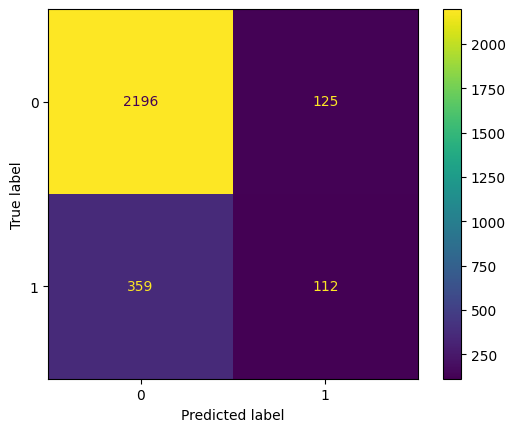

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.95      0.90      2321
    Predicted would leave       0.47      0.24      0.32       471

                 accuracy                           0.83      2792
                macro avg       0.67      0.59      0.61      2792
             weighted avg       0.79      0.83      0.80      2792



In [32]:
# Set input and output variables
y = df_logreg['Left Company?']
x = df_logreg.drop('Left Company?', axis=1)

# Split the data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

# Create logistic regression
y_pred = LogisticRegression(max_iter=1000).fit(x_train, y_train).predict(x_test)

# Create confusion matrix
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.show()

# Create classification report for the logistic regression model
print(classification_report(y_test, y_pred, target_names=['Predicted would not leave', 'Predicted would leave']))

The weighted averages of precision, recall, F1 score, and accuracy are all in the ballpark of 80%. However, the purpose of the regression is to predict whether employees will leave. Looking at when the model predicted an employee would leave, the precision, recall, and F1 score are all below 50%.

# 5. Tree-Based Model

To create a more effective model, we'll try a different approach. The data is still categorical, so a tree-based model would be appropriate. Given that decision trees can be vulnerable to overfitting, a random forest model will be used. Model creation will involve the following steps:

1. Create a new train-test split using the existing data.
2. Perform a grid search on the forest to determine the optimal parameters.
3. Fit the model to the training data and report the best parameters, AUC score, and CV results.
4. Identify the metrics with the max AUC score.

In [24]:
# Create a new train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

# Initialize random forest
t = RandomForestClassifier()

# Set hyper parameters for optimizing the forest
cv_params = {
                'max_depth': [3, 5, None], 
                'max_features': [1.0],
                'max_samples': [0.7, 1.0],
                'min_samples_leaf': [1, 2, 3],
                'min_samples_split': [2, 3, 4],
                'n_estimators': [300, 500],
            }  

# Set scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Initialize grid search
rf = GridSearchCV(t, cv_params, scoring=scoring, cv=4, refit='roc_auc')

# Get model results
rf.fit(x_train, y_train)
print(rf.best_score_)
print(rf.best_params_)
print(rf.cv_results_)

0.9827758043907204
{'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 500}
{'mean_fit_time': array([0.70062745, 1.23233831, 0.71533811, 1.22198319, 0.72531575,
       1.18781787, 0.7253195 , 1.34888649, 0.83427078, 1.26761091,
       0.86816972, 1.3603549 , 0.82778627, 1.31773549, 0.81157297,
       1.29902625, 0.76994193, 1.24486679, 0.89129376, 1.46639478,
       0.86249077, 1.48218757, 0.86190563, 1.42019892, 0.85046357,
       1.42326427, 0.85773706, 1.42328256, 0.8415466 , 1.41563392,
       0.83533621, 1.38591731, 0.86090809, 1.42098749, 0.87185127,
       1.43913102, 1.06625837, 1.77599168, 1.06935239, 1.73951113,
       1.05552822, 1.75494456, 1.04749846, 1.74422777, 1.06245494,
       1.74276382, 1.05939275, 1.75368786, 1.06164026, 1.7595824 ,
       1.05077261, 1.75783944, 1.04380846, 1.73588169, 1.2190038 ,
       2.03414971, 1.22319847, 2.06109035, 1.24211049, 2.03637654,
       1.23491895, 2.04266316, 1.

In [25]:
# Get row of CV results with max AUC score
cv_results = pd.DataFrame(rf.cv_results_)
max_results = cv_results.iloc[cv_results['mean_test_roc_auc'].idxmax(), :]

# Create table of results
res = pd.DataFrame({
                      'Model': ['Random Forest CV'],
                      'Precision': [max_results.mean_test_precision],
                      'Recall': [max_results.mean_test_recall],
                      'F1': [max_results.mean_test_f1],
                      'Accuracy': [max_results.mean_test_accuracy],
                      'AUC': [max_results.mean_test_roc_auc]
                   })
print(res)

              Model  Precision   Recall        F1  Accuracy       AUC
0  Random Forest CV   0.967875  0.91708  0.941678  0.980895  0.982776


All metrics are above 90%, indicating that this model is a very good fit. The next step is to apply this model to the test data.

In [26]:
# Get predictions on test data
preds = rf.best_estimator_.predict(x_test)

auc = roc_auc_score(y_test, preds)
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

res = pd.DataFrame({
                        "model": ["Random Forest Test"],
                        "precision": [precision], 
                        "recall": [recall],
                        "f1": [f1],
                        "accuracy": [accuracy],
                        "AUC": [auc]
                   })
print(res)

                model  precision    recall        f1  accuracy       AUC
0  Random Forest Test   0.975446  0.927813  0.951034  0.983883  0.961537


The test scores are very similar to the validation scores, and are still above 90%, which indicates good performance. This appears to be a strong model. Since the test data was only used for this model, we can assume it will perform similarly on unseen data.

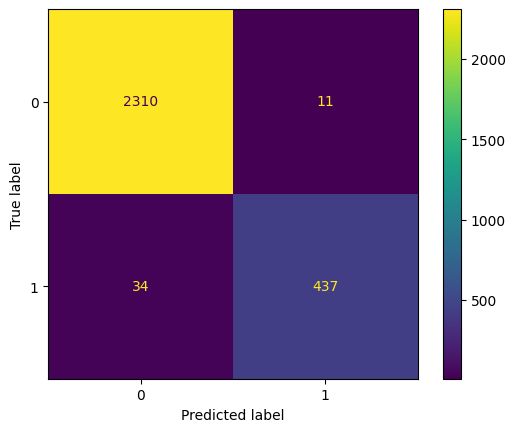

                           precision    recall  f1-score   support

Predicted would not leave       0.99      1.00      0.99      2321
    Predicted would leave       0.98      0.93      0.95       471

                 accuracy                           0.98      2792
                macro avg       0.98      0.96      0.97      2792
             weighted avg       0.98      0.98      0.98      2792



In [30]:
# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, preds)).plot()
plt.show()

# Create classification report for the random forest model
print(classification_report(y_test, preds, target_names=['Predicted would not leave', 'Predicted would leave']))

The model predicts more false negatives than false positives. There may be some employees that leave the company that were not flagged as such.

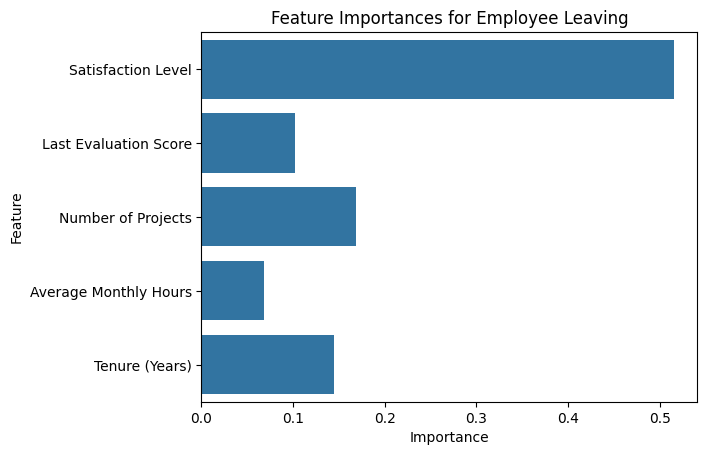

In [28]:
# Plot Gini importances
importances = pd.DataFrame(rf.best_estimator_.feature_importances_, columns=['gini_importance'], index=x.columns)

# Only extract the features with significant importances
importances = importances[importances['gini_importance'] > 0.001]

sns.barplot(data=importances, x="gini_importance", y=importances.index)
plt.title("Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

As expected, satisfaction level is the most important variable in determining whether an employee will leave the company. The second most important is the number of projects, followed closely by tenure. Interestingly, average monthly hours is the least important significant feature.

# 6. Conclusions and Recommendations

### Model Results

The logistic regression model achieved weighted averages for a precision of 80%, recall of 83%, and f1-score of 81%, with anaccuracy of 83%, on the test set. These values were much lower when looking at when employees were sucessfully predicted to leave. The random forest was a significant improvement, with the corresponding scores each at 98%.

### Next Steps

The models and the feature importances extracted confirm that employees at the company are overworked. 

To retain employees, the following are recommended:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for at least four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so.
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 